In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#data
clean_data = np.load('nmr_autoprocessing/data/clean_spectra/cell_systems_processed_X.npy') #labels/Y
raw_data = np.load('nmr_autoprocessing/data/clean_spectra/cell_systems_raw_X.npy') #data/X

#dimensions (samples, values per sample)
print(len(clean_data), len(clean_data[0]))

#splitting into train and test sets
train_raw_data, test_raw_data, train_clean_data, test_clean_data = train_test_split(raw_data, clean_data, random_state = 1)
print(len(test_raw_data[0]))

"""Building Neural Network to transform raw data to clean data"""

#Stochastic gradient descent optimizer
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)

#Building the model
model = keras.Sequential()
for i in range(3):
    model.add(keras.layers.Dense(10000, activation = 'relu'))#1


model.add(keras.layers.Dense(len(train_raw_data[0]), activation = 'relu'))#output layer
model.compile(optimizer='adam', loss='mean_squared_error') #optimizer could be adam or opt. MSE is good for linear reg

#training the model
model.fit(train_raw_data, train_clean_data, epochs = 6)

#evalutating the model
test_accuracy = model.evaluate(test_raw_data, test_clean_data)# This may not eb accuracy it may be a loss
a = model.predict(test_raw_data)
print("Results 1st sample {}".format(a[0]))
print("clean data[0]: {}".format(test_clean_data[0]))



285 26750
26750
Train on 213 samples
Epoch 1/6
 32/213 [===>..........................] - ETA: 3:30

ResourceExhaustedError:  OOM when allocating tensor with shape[10000,26750] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node MatMul_1 (defined at <ipython-input-34-96b7ea86ee82>:34) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_267320]

Function call stack:
distributed_function


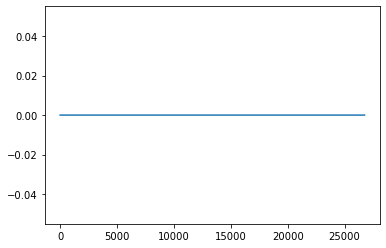

In [33]:
plt.plot(range(0,len(clean_data[0])),a[0])
plt.show()